<a href="https://colab.research.google.com/github/bodong408/Machine-Learning/blob/main/Copy_of_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
num_words=10000)

2113536/2110848 [==============================] - 0s 0us/step


In [ ]:
train_data.shape

(8982,)

In [ ]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in
train_data[0]])

557056/550378 [==============================] - 0s 0us/step


In [ ]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [ ]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results
  
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
def to_one_hot(labels, dimension=46):
  results = np.zeros((len(labels), dimension))
  for i, label in enumerate(labels):
    results[i, label] = 1.
  return results
  
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [ ]:
one_hot_train_labels.shape

(8982, 46)

In [ ]:
from keras.utils.np_utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [ ]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                640064    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 46)                2990      
Total params: 647,214
Trainable params: 647,214
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

In [ ]:
x_train.shape


(8982, 10000)

In [ ]:
one_hot_train_labels.shape

(8982, 46)

In [ ]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [ ]:
partial_y_train.shape

(7982, 46)

In [ ]:
partial_x_train.shape

(7982, 10000)

In [ ]:
history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 0s 28ms/step - loss: 2.5329 - accuracy: 0.5119 - val_loss: 1.6905 - val_accuracy: 0.6150
Epoch 2/20
16/16 [==============================] - 0s 15ms/step - loss: 1.3982 - accuracy: 0.7095 - val_loss: 1.3084 - val_accuracy: 0.7160
Epoch 3/20
16/16 [==============================] - 0s 16ms/step - loss: 1.0551 - accuracy: 0.7737 - val_loss: 1.1615 - val_accuracy: 0.7400
Epoch 4/20
16/16 [==============================] - 0s 15ms/step - loss: 0.8312 - accuracy: 0.8230 - val_loss: 1.0425 - val_accuracy: 0.7740
Epoch 5/20
16/16 [==============================] - 0s 16ms/step - loss: 0.6616 - accuracy: 0.8592 - val_loss: 0.9850 - val_accuracy: 0.7900
Epoch 6/20
16/16 [==============================] - 0s 16ms/step - loss: 0.5241 - accuracy: 0.8909 - val_loss: 0.9114 - val_accuracy: 0.8100
Epoch 7/20
16/16 [==============================] - 0s 16ms/step - loss: 0.4154 - accuracy: 0.9131 - val_loss: 0.8930 - val_accuracy: 0.8150
Epoch 8/20
16

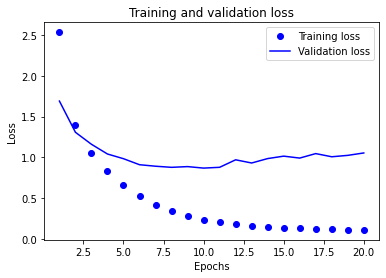

In [ ]:
import matplotlib.pyplot as plt
loss = history.history['loss']b
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

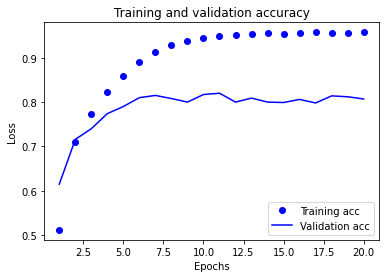

In [ ]:
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])
model.fit(partial_x_train,
partial_y_train,
epochs=9,
batch_size=512,
validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 0s 26ms/step - loss: 2.7039 - accuracy: 0.5189 - val_loss: 1.7842 - val_accuracy: 0.6700
Epoch 2/9
16/16 [==============================] - 0s 16ms/step - loss: 1.4437 - accuracy: 0.7021 - val_loss: 1.3292 - val_accuracy: 0.7090
Epoch 3/9
16/16 [==============================] - 0s 15ms/step - loss: 1.0623 - accuracy: 0.7645 - val_loss: 1.1275 - val_accuracy: 0.7490
Epoch 4/9
16/16 [==============================] - 0s 16ms/step - loss: 0.8281 - accuracy: 0.8196 - val_loss: 1.0250 - val_accuracy: 0.7770
Epoch 5/9
16/16 [==============================] - 0s 15ms/step - loss: 0.6564 - accuracy: 0.8614 - val_loss: 0.9715 - val_accuracy: 0.7890
Epoch 6/9
16/16 [==============================] - 0s 16ms/step - loss: 0.5228 - accuracy: 0.8920 - val_loss: 0.9442 - val_accuracy: 0.8030
Epoch 7/9
16/16 [==============================] - 0s 16ms/step - loss: 0.4221 - accuracy: 0.9146 - val_loss: 0.9021 - val_accuracy: 0.8090
Epoch 8/9
16/16 [===

In [ ]:
results

[0.9859775900840759, 0.7889581322669983]

In [ ]:
predictions = model.predict(x_test)

In [ ]:
np.argmax(predictions[0])

3

In [ ]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [ ]:
model.compile(optimizer='rmsprop',
loss='sparse_categorical_crossentropy',
metrics=['acc'])

In [ ]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])
model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=128,
validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 1s 11ms/step - loss: 1.6181 - accuracy: 0.6210 - val_loss: 1.4753 - val_accuracy: 0.6050
Epoch 2/20
63/63 [==============================] - 1s 8ms/step - loss: 0.9270 - accuracy: 0.7795 - val_loss: 1.0132 - val_accuracy: 0.7670
Epoch 3/20
63/63 [==============================] - 1s 8ms/step - loss: 0.5991 - accuracy: 0.8507 - val_loss: 1.0712 - val_accuracy: 0.7660
Epoch 4/20
63/63 [==============================] - 1s 8ms/step - loss: 0.4102 - accuracy: 0.8958 - val_loss: 1.0279 - val_accuracy: 0.7960
Epoch 5/20
63/63 [==============================] - 1s 8ms/step - loss: 0.2937 - accuracy: 0.9247 - val_loss: 1.1704 - val_accuracy: 0.7790
Epoch 6/20
63/63 [==============================] - 1s 8ms/step - loss: 0.2210 - accuracy: 0.9425 - val_loss: 1.3317 - val_accuracy: 0.7790
Epoch 7/20
63/63 [==============================] - 0s 8ms/step - loss: 0.1805 - accuracy: 0.9478 - val_loss: 1.4280 - val_accuracy: 0.7830
Epoch 8/20
63/63 [=